# A Machine Learning Approach to Equity Premium Prediction
By Shane Johnson, Catherine Markley, Yuanhao Niu, Nick Rocco (Fall 2018 Data Science Project)

We try to use machine learning methods to predict equity premium based on predictors from the seminal paper of Goyal and Welch (2008) updates until 2013. Our algorithms improves the prediction of equity premium

## Data Cleaning

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("raw_predictors_until2013.csv")

Generate the predictors based on the raw data, as in Welch and Goyal (2008)

In [3]:
# equity premium, i.e., the total rate of return on the stock market minus the prevailing short-term interest rate.
df['premium'] = df['CRSP_SPvw'] - df['Rfree']

# Dividend Price Ratio (d/p) is the difference between the log of dividends and the log of prices. 
df['d/p'] = np.log(df['D12']) - np.log(df['Index'])

# Dividend Yield (d/y) is the difference between the log of dividends and the log of lagged prices.
df['d/y'] = np.log(df['D12'])- np.log(df['Index'].shift(1))

# Earnings Price Ratio (e/p) is the difference between the log of earnings and the log of prices.
df['e/p'] = np.log(df['E12']) - np.log(df['Index'])

# Dividend Payout Ratio (d/e) is the difference between the log of dividends and the log of earnings.
df['d/e'] = np.log(df['D12']) - np.log(df['E12'])

# Term Spread (tms) is the difference between the long term yield on government bonds and the T-bill.
df['tms'] = df['lty'] - df['tbl']

# Default Yield Spread (dfy): is the difference between BAA- and AAA- rated cor- porate bond yields.
df['dfy'] = df['BAA'] - df['AAA']

# Default Return Spread (dfr): is the difference between the return on long-term corporate bonds and returns on the long-term government bonds.
df['dfr'] = df['corpr'] - df['ltr']

In [4]:
# drop the first observation for 1926/12
df = df[1:]

We generate indicators for bull market. Machine learning methods are also used to predict the dicretion of market movements. 

In [5]:
sLength = len(df['yyyymm'])
# add the bullMarket column with random ints (to be replaced in next cell)
df['bull'] = pd.Series(np.random.randn(sLength), index=df.index)
# Create bullMarkert for ret
bull = []
for d in df['CRSP_SPvw']:
    if d > 0:
        bull.append(1)
    else:
        bull.append(0)
df['bull'] = bull

In [6]:
# drop the redundent variables
df = df.drop(columns=['Index','D12', 'E12', 'AAA', 'BAA', 'CRSP_SPvwx', 'corpr','Rfree', 'CRSP_SPvw'])

In [7]:
df.dtypes

yyyymm       int64
Month        int64
b/m        float64
tbl        float64
lty        float64
ntis       float64
infl       float64
ltr        float64
svar       float64
csp        float64
premium    float64
d/p        float64
d/y        float64
e/p        float64
d/e        float64
tms        float64
dfy        float64
dfr        float64
bull         int64
dtype: object

In [8]:
pd.options.mode.chained_assignment=None
df['csp'][0:124] = df['csp'][124:911].mean()
df['csp'][912:]  = df['csp'][124:911].mean()

In [9]:
# reorganize the dataframe
df = df[['yyyymm','Month','bull','premium','d/p','d/y','e/p','d/e','svar',
          'csp','b/m','ntis','tbl','lty','ltr','tms','dfy','dfr','infl']]
df

,yyyymm,Month,bull,premium,d/p,d/y,e/p,d/e,svar,csp,b/m,ntis,tbl,lty,ltr,tms,dfy,dfr,infl
1,192701,1,0,-0.005602,-2.942374,-2.963349,-2.374773,-0.567601,0.000470,0.00037,0.443706,0.050834,0.0323,0.0351,0.0075,0.0028,0.0095,-0.0019,-0.011299
2,192702,2,1,0.042780,-2.979535,-2.932946,-2.430353,-0.549182,0.000287,0.00037,0.428501,0.051682,0.0329,0.0347,0.0088,0.0018,0.0092,-0.0019,-0.005714
3,192703,3,1,0.004657,-2.976535,-2.970053,-2.445079,-0.531456,0.000924,0.00037,0.469765,0.046370,0.0320,0.0331,0.0253,0.0011,0.0092,-0.0170,-0.005747
4,192704,4,1,0.010196,-2.984225,-2.967143,-2.471309,-0.512916,0.000603,0.00037,0.456754,0.050518,0.0339,0.0333,-0.0005,-0.0006,0.0090,0.0060,0.000000
5,192705,5,1,0.059578,-3.025963,-2.975058,-2.531446,-0.494518,0.000392,0.00037,0.434783,0.055279,0.0333,0.0327,0.0109,-0.0006,0.0093,-0.0120,0.005780
6,192706,6,0,-0.022928,-3.007309,-3.016743,-2.531330,-0.475979,0.000825,0.00037,0.452385,0.058826,0.0307,0.0334,-0.0069,0.0027,0.0097,0.0112,0.011494
7,192707,7,1,0.081983,-3.061144,-2.998173,-2.603707,-0.457437,0.000426,0.00037,0.414553,0.059754,0.0296,0.0333,0.0050,0.0037,0.0095,-0.0047,-0.017045
8,192708,8,1,0.031070,-3.095764,-3.052225,-2.656742,-0.439023,0.001276,0.00037,0.396227,0.054526,0.0270,0.0329,0.0076,0.0059,0.0092,0.0007,-0.005780
9,192709,9,1,0.050783,-3.129097,-3.086791,-2.707759,-0.421338,0.001123,0.00037,0.380586,0.094617,0.0268,0.0330,0.0018,0.0062,0.0088,0.0131,0.005814
10,192710,10,0,-0.049371,-3.065650,-3.120203,-2.662875,-0.402774,0.001559,0.00037,0.413801,0.094370,0.0308,0.0325,0.0099,0.0017,0.0087,-0.0044,0.005780


We recognize the correlation in time series. In order to take full advantage of the past data, we include the past 20 years' data in the prediction. Here we generate predictors for the past 20 years, i.e. 240 months

In [10]:
past = 241

num = len(df.columns)
for i in range(4,num):
    name = df.columns[i]
    for j in range(1,past):
        t = str(j)
        df[name+"-"+t] = df[name].shift(j)

In [11]:
# drop the first past 20 years predictors
df = df[past-1:]
df.dtypes

yyyymm        int64
Month         int64
bull          int64
premium     float64
d/p         float64
d/y         float64
e/p         float64
d/e         float64
svar        float64
csp         float64
b/m         float64
ntis        float64
tbl         float64
lty         float64
ltr         float64
tms         float64
dfy         float64
dfr         float64
infl        float64
d/p-1       float64
d/p-2       float64
d/p-3       float64
d/p-4       float64
d/p-5       float64
d/p-6       float64
d/p-7       float64
d/p-8       float64
d/p-9       float64
d/p-10      float64
d/p-11      float64
             ...   
infl-211    float64
infl-212    float64
infl-213    float64
infl-214    float64
infl-215    float64
infl-216    float64
infl-217    float64
infl-218    float64
infl-219    float64
infl-220    float64
infl-221    float64
infl-222    float64
infl-223    float64
infl-224    float64
infl-225    float64
infl-226    float64
infl-227    float64
infl-228    float64
infl-229    float64


In [12]:
# drop the contemporanous predictors
df = df.drop(columns=['d/p','d/y','e/p','d/e','svar',
          'csp','b/m','ntis','tbl','lty','ltr','tms','dfy','dfr','infl'])

In [13]:
# column number 3604: 'yyyymm','Month','bull','premium' + 15 indicator * 240 months 
len(df.columns)

3604

## Regression (Equity Premium Prediction)

In [14]:
# for regression purpose
ret = df.premium
x = df.iloc[:,4:]

In [15]:
# for classification purpose
bull = df.bull
norm_x = (x- x.mean())/x.std(ddof=0)

In [16]:
premium = 0
count = 0

temp = df['premium']

cumsum = []

for i in temp:
    premium += i
    count += 1
    cumsum.append(premium/count)

df['cumsum'] = cumsum

We will first start with the simplest linear regression model. 

In [17]:
# Here are 67 years of data prior to 2013 
# Spilt the data into 7 folds and cross-validate
# In each sample we have around 10 years of data

# Linear Regression Model (Benmark)

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_validation import KFold

kf = KFold(x.shape[0],n_folds=7, shuffle=True)

MSE = []
R2 =[]

for train_index, test_index in kf:
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    ret_train, ret_test = ret.iloc[train_index], ret.iloc[test_index]
    norm_x_train, norm_x_test = norm_x.iloc[train_index], norm_x.iloc[test_index]
    bull_train, bull_test = bull.iloc[train_index], bull.iloc[test_index]

    regr = linear_model.LinearRegression()
    regr.fit(x_train, ret_train)

    ret_pred = regr.predict(x_test)
    MSE.append(mean_squared_error(ret_test, ret_pred))
    R2.append(r2_score(ret_test, ret_pred))
    print("MSE: ", mean_squared_error(ret_test, ret_pred),"R2: ", r2_score(ret_test, ret_pred))
    
print( "the main take way: Mean(MSE) is", sum(MSE)/len(MSE),"Mean(R2) is", sum(R2)/len(R2))

/Users/NickRocco/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


('MSE: ', 0.00408459612336169, 'R2: ', -1.6654148418386416)
('MSE: ', 0.003883921985463541, 'R2: ', -1.08498955488475)
('MSE: ', 0.003147367043087412, 'R2: ', -0.5124115391926687)
('MSE: ', 0.005487237919582347, 'R2: ', -2.2685371641042895)
('MSE: ', 0.004310501385347736, 'R2: ', -1.5804261919217586)
('MSE: ', 0.004812226779219329, 'R2: ', -1.3855915848971811)
('MSE: ', 0.0049701852798329504, 'R2: ', -2.565314446532998)
('the main take way: Mean(MSE) is', 0.004385148073699286, 'Mean(R2) is', -1.5803836176246124)


In [18]:
# dimension reduction (maybe PCA??)

In [19]:
# Random Forrest # Davids paper: random forest regression with 100 regression trees as a the forecasting function gt.

#  https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

MSE = []
R2 =[]

for train_index, test_index in kf:
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    ret_train, ret_test = ret.iloc[train_index], ret.iloc[test_index]
    
    regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
    regr.fit(x_train, ret_train)
    
    ret_pred = regr.predict(x_test)
    MSE.append(mean_squared_error(ret_test, ret_pred))
    R2.append(r2_score(ret_test, ret_pred))
    print("MSE: ", mean_squared_error(ret_test, ret_pred),"R2: ", r2_score(ret_test, ret_pred))
    
print( "the main take way: Mean(MSE) is", sum(MSE)/len(MSE),"Mean(R2) is", sum(R2)/len(R2))

/Users/NickRocco/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


('MSE: ', 0.0016105406109297442, 'R2: ', -0.05096286587644383)
('MSE: ', 0.0018518991711360172, 'R2: ', 0.005852732632194213)
('MSE: ', 0.002162447125171994, 'R2: ', -0.039125701016405)
('MSE: ', 0.0017019630006309468, 'R2: ', -0.013794080194743152)
('MSE: ', 0.0016979387442536032, 'R2: ', -0.016449182186559552)
('MSE: ', 0.002039026893580041, 'R2: ', -0.01081798964858871)
('MSE: ', 0.00136975787344937, 'R2: ', 0.017417408104050236)
('the main take way: Mean(MSE) is', 0.0017762247741645307, 'Mean(R2) is', -0.015411382598070828)


In [20]:
# Random Forrest (another implementation)
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=10)
regr.fit(x_train, ret_train)
cross_val_score(regr, x, ret, scoring='neg_mean_squared_error',cv=7)  

array([-0.00142889, -0.00107345, -0.00221469, -0.00181998, -0.00202831,
       -0.00211922, -0.00213222])

In [21]:
# Boosted

# https://scikit-learn.org/stable/modules/ensemble.html#adaboost

from sklearn.ensemble import GradientBoostingRegressor

MSE = []
R2 =[]

for train_index, test_index in kf:
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    ret_train, ret_test = ret.iloc[train_index], ret.iloc[test_index]
    
    regr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls')
    regr.fit(x_train, ret_train)
    
    ret_pred = regr.predict(x_test)
    MSE.append(mean_squared_error(ret_test, ret_pred))
    R2.append(r2_score(ret_test, ret_pred))
    print("MSE: ", mean_squared_error(ret_test, ret_pred),"R2: ", r2_score(ret_test, ret_pred))
    
print( "the main take way: Mean(MSE) is", sum(MSE)/len(MSE),"Mean(R2) is", sum(R2)/len(R2))

('MSE: ', 0.0017144283453946049, 'R2: ', -0.11875510309272341)
('MSE: ', 0.0019080636459779306, 'R2: ', -0.024297806909861164)
('MSE: ', 0.0020950793930670022, 'R2: ', -0.006753329440421618)
('MSE: ', 0.00183157535932897, 'R2: ', -0.09099919095180509)
('MSE: ', 0.0015854207170962922, 'R2: ', 0.05090828702271355)
('MSE: ', 0.002006823376627206, 'R2: ', 0.005146436504087082)
('MSE: ', 0.0015061284342218798, 'R2: ', -0.08040669764445352)
('the main take way: Mean(MSE) is', 0.0018067884673876981, 'Mean(R2) is', -0.03787962921606631)


In [22]:
# Neural Nets

## Classification (Bull Market Prediction)

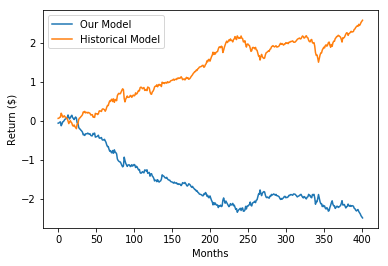

[[117 202]
 [ 31  52]]
('precision: ', 0)
('recall: ', 0)
the main take way: ??


In [103]:
# decision tree CART algorithm

from sklearn import tree
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


norm_x_train = norm_x[0:len(norm_x)/2]
norm_x_test = norm_x[len(norm_x)/2:]
bull_train = bull[0:len(bull)/2]
bull_test = bull[len(bull)/2:]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(norm_x_train, bull_train)
predicted = clf.predict(norm_x_test)
c_matrix = confusion_matrix(predicted,bull_test)
precision = c_matrix[1,1]/(c_matrix[1,1]+c_matrix[0,1])
recall= c_matrix[1,1]/(c_matrix[1,1]+c_matrix[1,0])

temp = df['premium']
premium = temp[len(temp)/2:]

cumsum = 0
cs = []

cumsum_h = 0
cs_h = []

for i in range(len(predicted)):
    if predicted[i] == 1:
        cumsum += premium[i+643]
    else:
        cumsum += -1*premium[i+643]
    cs.append(cumsum)

for i in range(len(bull_test)):
    cumsum_h += premium[i+643]
    cs_h.append(cumsum_h)
    
plt.figure()
plt.plot(cs, label='Our Model')
plt.plot(cs_h, label='Historical Model')
plt.legend(loc='best')
plt.ylabel('Return ($)')
plt.xlabel('Months')
plt.show()

#print(predicted)

print(c_matrix)  

print("precision: ", precision)  
print("recall: ", recall)  

print( "the main take way: ??")

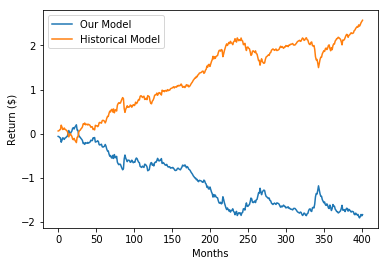

[[136 231]
 [ 12  23]]
('precision: ', 0)
('recall: ', 0)
the main take way: ???


In [104]:
# naive Bayes 
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(norm_x_train,bull_train).predict(norm_x_test)

predicted= gnb.predict(norm_x_test)

c_matrix = confusion_matrix(predicted,bull_test)
precision = c_matrix[1,1]/(c_matrix[1,1]+c_matrix[0,1])
recall= c_matrix[1,1]/(c_matrix[1,1]+c_matrix[1,0])

temp = df['premium']
premium = temp[len(temp)/2:]

cumsum = 0
cs = []

cumsum_h = 0
cs_h = []

for i in range(len(predicted)):
    if predicted[i] == 1:
        cumsum += premium[i+643]
    else:
        cumsum += -1*premium[i+643]
    cs.append(cumsum)

for i in range(len(bull_test)):
    cumsum_h += premium[i+643]
    cs_h.append(cumsum_h)
    
plt.figure()
plt.plot(cs, label='Our Model')
plt.plot(cs_h, label='Historical Model')
plt.legend(loc='best')
plt.ylabel('Return ($)')
plt.xlabel('Months')
plt.show()

print(c_matrix)  

print("precision: ", precision)  
print("recall: ", recall)  

print( "the main take way: ???")

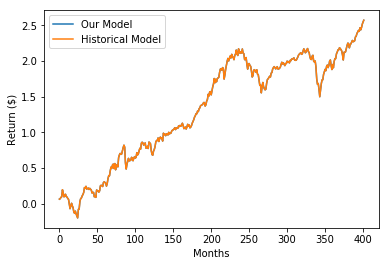

[[  0   0]
 [148 254]]
('precision: ', 1)
('recall: ', 0)
the main take way: ??? 


In [105]:
# Support Vector Classification

from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(norm_x_train, bull_train) 

predicted= clf.predict(norm_x_test)

c_matrix = confusion_matrix(predicted,bull_test)
precision = c_matrix[1,1]/(c_matrix[1,1]+c_matrix[0,1])
recall= c_matrix[1,1]/(c_matrix[1,1]+c_matrix[1,0])

temp = df['premium']
premium = temp[len(temp)/2:]

cumsum = 0
cs = []

cumsum_h = 0
cs_h = []

for i in range(len(predicted)):
    if predicted[i] == 1:
        cumsum += premium[i+643]
    else:
        cumsum += -1*premium[i+643]
    cs.append(cumsum)

for i in range(len(bull_test)):
    cumsum_h += premium[i+643]
    cs_h.append(cumsum_h)


plt.figure()
plt.plot(cs, label='Our Model')
plt.plot(cs_h, label='Historical Model')
plt.legend(loc='best')
plt.ylabel('Return ($)')
plt.xlabel('Months')
plt.show()

print(c_matrix)  

print("precision: ", precision)  
print("recall: ", recall)  

print( "the main take way: ??? ")

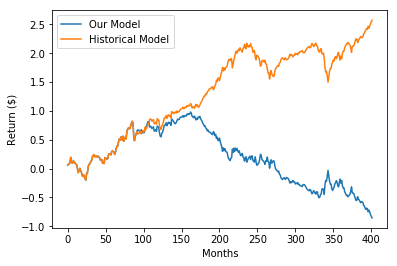

[[ 75 149]
 [ 73 105]]
('precision: ', 0)
('recall: ', 0)
the main take way: ??? 


In [107]:
#K-Means

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(norm_x_train, bull_train)
predicted= clf.predict(norm_x_test)

c_matrix = confusion_matrix(predicted,bull_test)
precision = c_matrix[1,1]/(c_matrix[1,1]+c_matrix[0,1])
recall= c_matrix[1,1]/(c_matrix[1,1]+c_matrix[1,0])

temp = df['premium']
premium = temp[len(temp)/2:]

cumsum = 0
cs = []

cumsum_h = 0
cs_h = []

for i in range(len(predicted)):
    if predicted[i] == 1:
        cumsum += premium[i+643]
    else:
        cumsum += -1*premium[i+643]
    cs.append(cumsum)

for i in range(len(bull_test)):
    cumsum_h += premium[i+643]
    cs_h.append(cumsum_h)
    
plt.figure()
plt.plot(cs, label='Our Model')
plt.plot(cs_h, label='Historical Model')
plt.legend(loc='best')
plt.ylabel('Return ($)')
plt.xlabel('Months')
plt.show()

print(c_matrix)  

print("precision: ", precision)  
print("recall: ", recall)  

print( "the main take way: ??? ")